# <div style="text-align: center;">ACM40990 OPTIMISATION IN MACHINE LEARNING </div>
# <div style="text-align: center;"> ASSIGNMENT 3 </div>
# <div style="text-align: center;"> David Lisovski - 18306686 </div>

# Question 1: Cross-entropy Cost Function
1. Train network with a single hidden layer with 30 neurons using the cross-entropy cost function. Note: you should use a different learning rate to produce comparable results. A good rule of thumb is to reduce the rate by a factor of 6 when using a cross-entropy cost function compared to a quadratic cost function.
2. Compare the accuracy against the quadratic cost case.
3. Repeat, but with 100 neurons.


We look at training a neural network with a single hidden layer of 30 neurons with cross-entropy cost function. We compare the accuracy of this network to a network trained with quadratic cost. 

We begin by loading necessary Python libraries. 

In [5]:
#Please make sure that network.py is in same folder as notebook 
from network import Network, QuadraticCost, CrossEntropyCost
import mnist_loader
import random
import matplotlib.pyplot as plt 

The `network` library contains code to initialize, train, and evaulate a neural network.

The `mnist_loader` library contains code to import the minst dataset.

We load the mnist dataset using the following code chunk. 

Note: We make a copy of the data. Python free's the data after it's been used.

In [6]:
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()

# create copy of data - otherwise you'll have to reload data everytime you train the network
train = [i for i in list(training_data)]
validation = [i for i in list(validation_data)]
test = [i for i in list(test_data)]

We define the network with quadratic cost in the following code chunk. We train this network for $30$ epochs and a batch size $100$, then compare it to a network trained with cross-entropy cost.

In [ ]:
net = Network([784, 30, 10], cost=QuadraticCost)
net.large_weight_initializer()
# Note: This may take some time
evaluation_cost_qc, evaluation_accuracy_qc, training_cost_qc, training_accuracy_qc = net.SGD(train, 
                                                                                             30, 100, 3.0, 
                                                                                             evaluation_data=test,
                                                                                             monitor_evaluation_cost=True,
                                                                                             monitor_evaluation_accuracy=True,
                                                                                             monitor_training_cost=True,
                                                                                             monitor_training_accuracy=True)

Now we train an equivalent network but with cross-entropy cost.

In [ ]:
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Note: This may take some time
evaluation_cost_cec, evaluation_accuracy_cec, training_cost_cec, training_accuracy_cec = net.SGD(train, 
                                                                                                 30, 100, 0.5, 
                                                                                                 evaluation_data=test,
                                                                                                 monitor_evaluation_cost=True,
                                                                                                 monitor_evaluation_accuracy=True,
                                                                                                 monitor_training_cost=True,
                                                                                                 monitor_training_accuracy=True)

Finally, we'll train a network with 100 hidden nodes and cross-entropy cost. The following code chunk initializes the network and trains it, using batch gradient descent with a batch size of 100, for 30 epochs.

In [ ]:
net = Network([784, 100, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
# Note: This may take some time
evaluation_cost_100, evaluation_accuracy_100, training_cost_100, training_accuracy_100 = net.SGD(train, 
                                                                                                 30, 100, 0.5, 
                                                                                                 evaluation_data=test,
                                                                                                 monitor_evaluation_cost=True,
                                                                                                 monitor_evaluation_accuracy=True,
                                                                                                 monitor_training_cost=True,
                                                                                                 monitor_training_accuracy=True)

After training all the networks, we plot their accuracy and cost as a function of epoch. The following code chunk achieves this. 

Text(0.5, 1.0, 'Training and Test Accuracy')

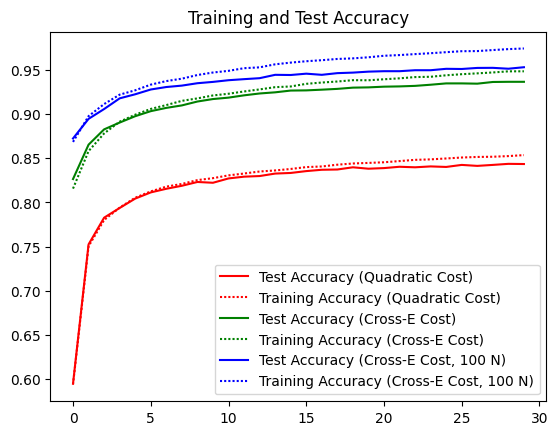

In [10]:
fig, ax = plt.subplots()
#plot training/test accuracy of quadratic cost net
ax.plot(evaluation_accuracy_qc , color='red', label="Test Accuracy (Quadratic Cost)")
ax.plot(training_accuracy_qc, color='red', linestyle = (0, (1, 1)), label="Training Accuracy (Quadratic Cost)")
#plot training/test accuracy of cross-entropy cost net
ax.plot(evaluation_accuracy_cec, color='green', label="Test Accuracy (Cross-E Cost)")
ax.plot(training_accuracy_cec, color='green', linestyle = (0, (1, 1)), label="Training Accuracy (Cross-E Cost)")
#plot training/test accuracy of cross-entropy cost & 100 neurons net
ax.plot(evaluation_accuracy_100, color='blue', label="Test Accuracy (Cross-E Cost, 100 N)")
ax.plot(training_accuracy_100, color='blue', linestyle = (0, (1, 1)), label="Training Accuracy (Cross-E Cost, 100 N)")
#plot training accuracy
ax.legend(loc="lower right")
plt.title("Training and Test Accuracy")

The Figure in the output of the code chunk above illustrates the test/training accuracy of the three models. We see the network with quadratic cost performed the worst, reaching a maximum accuracy of $\sim83\%$. The cross-entropy cost network performed far better with an accuracy of above 90%. The network with cross-entropy cost and 100 hidden nodes performed the best, achieving an accuracy of $\sim95\%$. This network also had the largest training/test accuracy deviance. This suggests this network is overfitting.

# Question 2: Overfitting and Regularization
1. Train a 30 neuron network with a 1000-sample subset of the MNIST training data. Use the cross-entropy cost function and train for 400 epochs. Enabe monitoring of the evaluation accuracy and training cost and plot the results.
2. Train the network again, but this time including regularization by setting `lmbda=0.1`.
3. Compare the results in the two cases.

Training a network on the full dataset, even with batch gradient descent, is computationally expensive and time-consuming. Here we train a network on a subset of the training dataset, 1000 random samples. 

We train a network with 30 hidden nodes for 400 epochs without regularization. Then, we train the same network with regularization $\lambda=0.1$. Finally we compare the results of the two networks.

The following code chunk samples 1000 random samples from the training set.

In [11]:
subset_train = random.sample(train, 1000)

The following code chunk trains the network with 30 hidden nodes for 400 epochs. We consider a batch size of 100 or 10% of the training set. 

In [ ]:
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost_noreg, test_accuracy_noreg, train_cost_noreg, train_accuracy_noreg = net.SGD(subset_train, 
                                                                                       400, 100, 0.5, 
                                                                                       evaluation_data=test,
                                                                                       monitor_evaluation_cost=True,
                                                                                       monitor_evaluation_accuracy=True,
                                                                                       monitor_training_cost=True,
                                                                                       monitor_training_accuracy=True)

Next, we train the same network with regularization $\lambda=0.1$.

In [ ]:
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.large_weight_initializer()
test_cost_reg, test_accuracy_reg, train_cost_reg, train_accuracy_reg = net.SGD(subset_train, 
                                                                               400, 100, 0.5, 
                                                                               lmbda = 0.1,
                                                                               evaluation_data=test,
                                                                               monitor_evaluation_cost=True,
                                                                               monitor_evaluation_accuracy=True,
                                                                               monitor_training_cost=True,
                                                                               monitor_training_accuracy=True)

And compare the results in a plot.

Text(0.5, 1.0, 'Training and Test Accuracy')

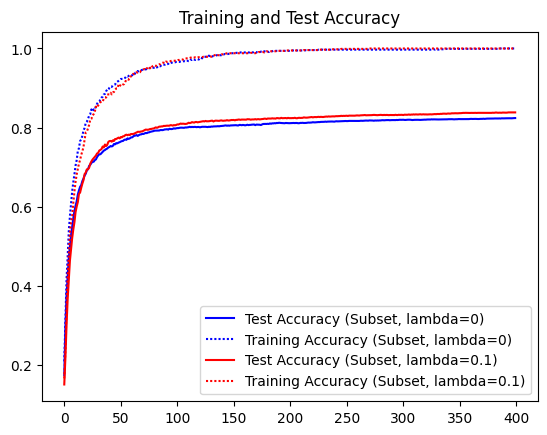

In [21]:
fig, ax = plt.subplots()
#plot training/test accuracy of cross-entropy cost & no regularization
ax.plot(test_accuracy_noreg, color='blue', label="Test Accuracy (Subset, lambda=0)")
ax.plot(train_accuracy_noreg, color='blue', linestyle = (0, (1, 1)), label="Training Accuracy (Subset, lambda=0)")
#plot training/test accuracy of cross-entropy cost & regularization
ax.plot(test_accuracy_reg, color='red', label="Test Accuracy (Subset, lambda=0.1)")
ax.plot(train_accuracy_reg, color='red', linestyle = (0, (1, 1)), label="Training Accuracy (Subset, lambda=0.1)")
#plot training accuracy
ax.legend(loc="lower right")
plt.title("Training and Test Accuracy")

The Figure in the output of the code chunk above illustrates the test/training accuracy of the two models. Both networks had the same training accuracy and similar test accuracy at convergence. The network with regularization performed slightly better ($\sim2\%$ better) compared to the default network. We could improve the performance by increasing the penalization parameter $\lambda$.

# Question 3: Weight Initialization
1. Train your network again, but this time use the improved `default_weight_initializer` weight initialization.
2. Compare the accuracy with previous cases.

This final section will look at the effects of weight initialization on training. 

Previously we used a weight initialization method which set weights from samples of the normal distribution. In networks with many parameters the normal distribution may set parameters too large. Here we consider an alternative initialization method. We reduce the initialized parameters by dividing by the square root of the number of parameters in each layer. We investigate the effect this has on training.

The following code chunk initializes the network (30 nodes, 1000 training set, 100 batch) with the new initialisation method. We train the network for $400$ epochs and compare the results with the networks in question 2.

In [ ]:
net = Network([784, 30, 10], cost=CrossEntropyCost)
net.default_weight_initializer()
test_cost, test_accuracy, train_cost, train_accuracy = net.SGD(subset_train, 
                                                               400, 100, 0.5,
                                                               evaluation_data=test,
                                                               monitor_evaluation_cost=True,
                                                               monitor_evaluation_accuracy=True,
                                                               monitor_training_cost=True,
                                                               monitor_training_accuracy=True)

Text(0.5, 1.0, 'Training and Test Accuracy')

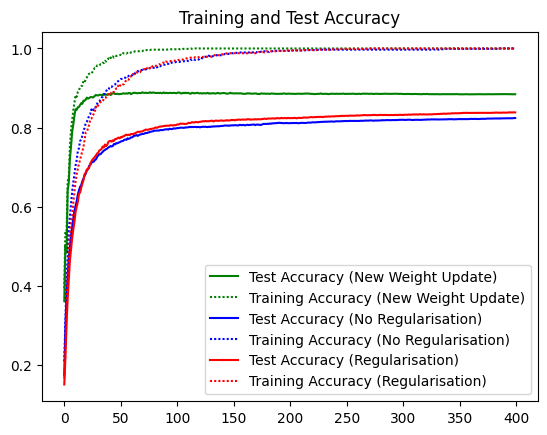

In [20]:
fig, ax = plt.subplots()
#plot training/test accuracy of cross-entropy cost net
ax.plot(test_accuracy, color='green', label="Test Accuracy (New Weight Update)")
ax.plot(train_accuracy, color='green', linestyle = (0, (1, 1)), label="Training Accuracy (New Weight Update)")
#plot training/test accuracy of cross-entropy cost & 100 neurons net
ax.plot(test_accuracy_noreg, color='blue', label="Test Accuracy (No Regularisation)")
ax.plot(train_accuracy_noreg, color='blue', linestyle = (0, (1, 1)), label="Training Accuracy (No Regularisation)")
#plot training/test accuracy of cross-entropy cost & 100 neurons net
ax.plot(test_accuracy_reg, color='red', label="Test Accuracy (Regularisation)")
ax.plot(train_accuracy_reg, color='red', linestyle = (0, (1, 1)), label="Training Accuracy (Regularisation)")
#plot training accuracy
ax.legend(loc="lower right")
plt.title("Training and Test Accuracy")

The Figure in the output of the code chunk above illustrates the test/training accuracy of the three models. The network with the updated weight initialization method performed better then the default and regularized network. It converged in less epochs (25 or so) and achieved a higher accuracy ($\sim90\%$ compared to $\sim80\%$). The network achieved accuracy similar to the accuracy reached by the network in Question 1. That network was trained on 10 times (10,000) as many samples (10,000 v 1000). This suggests using a suitable weight initialisation methodology is key to robust, high accuracy models.